# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [56]:
import pandas as pd

df = pd.read_csv("data/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [57]:
df["fire"] = (df["area"] > 0).astype(int)     # 1 = fire
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [58]:
import numpy as np

month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4,
    "may": 5, "jun": 6, "jul": 7, "aug": 8,
    "sep": 9, "oct":10, "nov":11, "dec":12
}
day_map = {
    "mon": 0, "tue": 1, "wed": 2, "thu": 3,
    "fri": 4, "sat": 5, "sun": 6
}

# case-insensitive lookup, strip whitespace just in case
df["month_num"] = (df["month"]
                   .str.strip().str[:3].str.lower()
                   .map(month_map))
df["day_num"] = (df["day"]
                 .str.strip().str[:3].str.lower()
                 .map(day_map))

if df["month_num"].isna().any() or df["day_num"].isna().any():
    bad_rows = df[df["month_num"].isna() | df["day_num"].isna()]
    raise ValueError(f"Unmapped month/day strings:\n{bad_rows[['month','day']].head()}")

# ── 1-c ➜ cyclical encoding ─────────────────────────–
df["month_sin"] = np.sin(2*np.pi*df["month_num"] / 12)
df["month_cos"] = np.cos(2*np.pi*df["month_num"] / 12)
df["day_sin"]   = np.sin(2*np.pi*df["day_num"]   / 7)
df["day_cos"]   = np.cos(2*np.pi*df["day_num"]   / 7)

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,month_num,day_num,month_sin,month_cos,day_sin,day_cos
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,3,4,1.000000,6.123234e-17,-0.433884,-0.900969
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,10,1,-0.866025,5.000000e-01,0.781831,0.623490
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,10,5,-0.866025,5.000000e-01,-0.974928,-0.222521
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,3,4,1.000000,6.123234e-17,-0.433884,-0.900969
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,3,6,1.000000,6.123234e-17,-0.781831,0.623490


In [40]:
df.isna().sum()

X            0
Y            0
month        0
day          0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
fire         0
month_num    0
day_num      0
month_sin    0
month_cos    0
day_sin      0
day_cos      0
dtype: int64

In [41]:
df.duplicated().sum()

4

In [42]:
df = df.copy()
df.drop_duplicates(inplace = True)
df[df.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,month_num,day_num,month_sin,month_cos,day_sin,day_cos


In [44]:
from scipy.stats import zscore
y_outliers = df[abs(zscore(df['area'])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,month_num,day_num,month_sin,month_cos,day_sin,day_cos
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,1,9,1,-1.000000,-1.836970e-16,0.781831,0.623490
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,1,9,5,-1.000000,-1.836970e-16,-0.974928,-0.222521
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,1,8,3,-0.866025,-5.000000e-01,0.433884,-0.900969
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,1,7,0,-0.500000,-8.660254e-01,0.000000,1.000000


In [45]:
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,rain,area,fire,month_num,day_num,month_sin,month_cos,day_sin,day_cos,damage_category
429,3,4,aug,sun,91.6,181.3,613.0,7.6,24.6,44,...,0.0,3.20,1,8,6,-0.866025,-5.000000e-01,-0.781831,0.623490,moderate
436,8,6,aug,mon,92.1,207.0,672.6,8.2,26.8,35,...,0.0,0.54,1,8,0,-0.866025,-5.000000e-01,0.000000,1.000000,low
233,9,4,sep,tue,84.4,73.4,671.9,3.2,24.3,36,...,0.0,105.66,1,9,1,-1.000000,-1.836970e-16,0.781831,0.623490,very high
494,6,6,aug,sat,96.0,164.0,643.0,14.0,30.8,30,...,0.0,8.59,1,8,5,-0.866025,-5.000000e-01,-0.974928,-0.222521,moderate
10,7,5,sep,sat,92.5,88.0,698.6,7.1,17.8,51,...,0.0,0.00,0,9,5,-1.000000,-1.836970e-16,-0.974928,-0.222521,No damage


In [46]:
# FFMC and rain are still having high skew and kurtosis values, 
# since we will be using Linear regression model we cannot operate with such high values
# so for FFMC we can remove the outliers in them using z-score method
mask = df.loc[:, ['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

df = df[mask.values]
df.shape

(506, 21)

[Stage-1] Test AUROC  : 0.714
[Stage-1] Test F1-score: 0.709
Best Hyperparameters found by RandomizedSearchCV:
{'rf__n_estimators': 300, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': None}
Test AUROC : 0.7144444444444444
F1 (thr=0.3): 0.725925925925926

Accuracy: 0.6923076923076923

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.70      0.72      0.71        54

    accuracy                           0.69       104
   macro avg       0.69      0.69      0.69       104
weighted avg       0.69      0.69      0.69       104



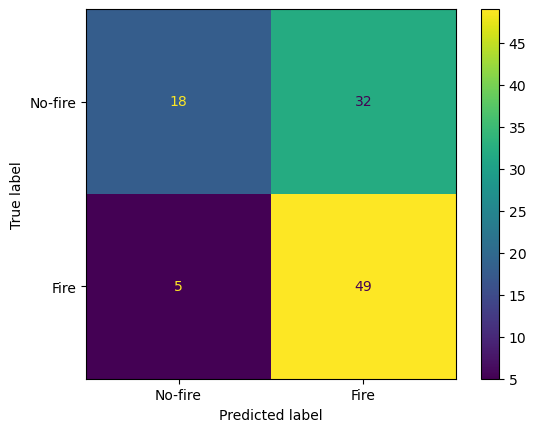

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline        import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report, accuracy_score, ConfusionMatrixDisplay, \
    confusion_matrix
from sklearn.calibration      import CalibratedClassifierCV
from scipy.stats              import randint, loguniform


# feature_cols = [
#     "X", "Y",
#     "month_sin", "month_cos",
#     "day_sin",   "day_cos",
#     "FFMC", "DMC", "DC", "ISI",
#     "temp", "RH", "wind", "rain",
# ]

feature_cols = [
    "X", "Y",
    "month_sin", "month_cos",
    "day_sin",   "day_cos",
    "FFMC", "DMC", "DC", "ISI",
]  # BEST RESULT SO FAR

# feature_cols = [
#     "X", "Y",
#     "month_sin", "month_cos",
#     "day_sin",   "day_cos",
#     "FFMC", "DMC", "DC", "ISI",
#     "temp", "RH", "wind", "rain",
# ]

X = df[feature_cols].values          # predictors
y_bin = df["fire"].values            # stage-1 target
# le = LabelEncoder()
# y_bin = le.fit_transform(df["damage_category"])


X_tr, X_te, y_tr, y_te = train_test_split(
        X, y_bin, test_size=0.2, stratify=y_bin, random_state=42)

param_distributions = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced", None, "balanced_subsample"],
}

rf = RandomForestClassifier(random_state=42)

pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("rf",    RandomForestClassifier(random_state=42))
])

random_search = RandomizedSearchCV(
    pipe,
    param_distributions={
        # prefix 'rf__' for the RF hyper-params
        "rf__n_estimators": [300, 500, 800],
        "rf__max_depth"  : [10, 15, None],
        "rf__min_samples_leaf": [1, 2, 5],
        "rf__max_features": ["sqrt", "log2"],
    },
    n_iter=25,
    cv=5,
    scoring="roc_auc",
    refit=True,
    random_state=42,
    n_jobs=-1
)

# 6. Fit random search on training data
random_search.fit(X_tr, y_tr)

# ----- quick sanity check on held-out data ----------
prob_test = random_search.predict_proba(X_te)[:, 1]
print(f"[Stage-1] Test AUROC  : {roc_auc_score(y_te, prob_test):.3f}")
print(f"[Stage-1] Test F1-score: {f1_score(y_te, prob_test > 0.5):.3f}")

# 7. Get the best model and hyperparameters
best_rf = random_search.best_estimator_
print("Best Hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_
probs   = best_rf.predict_proba(X_te)[:, 1]
y_pred  = (probs >= 0.3).astype(int)       # 0.3 ≈ catch more fires

print("Test AUROC :", roc_auc_score(y_te, probs))
print("F1 (thr=0.3):", f1_score(y_te, y_pred))
# print(classification_report(y_te, y_pred, digits=3))

cm = confusion_matrix(y_te, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No-fire", "Fire"]).plot()


# 8. Predict on test data (standard prediction, no custom threshold)
y_pred = best_rf.predict(X_te)

# 9. Evaluate
accuracy = accuracy_score(y_te, y_pred)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_te, y_pred))

# pick the booster that exists in your scikit-learn
# try:
#     from sklearn.ensemble import HistGradientBoostingClassifier as GBT
#     booster_name = "HistGradientBoosting"
#     base_model   = GBT(loss="log_loss", random_state=42)
#     param_grid   = {
#         "clf__learning_rate"   : loguniform(0.01, 0.2),
#         "clf__max_depth"       : randint(3, 10),
#         "clf__min_samples_leaf": randint(10, 40),
#         "clf__l2_regularization": loguniform(1e-2, 10),
#         "clf__max_iter"        : randint(200, 600),
#     }
# except ImportError:
#     from sklearn.ensemble import GradientBoostingClassifier as GBT
#     booster_name = "GradientBoosting"
#     base_model   = GBT(random_state=42)
#     param_grid   = {
#         "clf__learning_rate"   : loguniform(0.01, 0.2),
#         "clf__max_depth"       : randint(3, 10),
#         "clf__min_samples_split": randint(2, 20),
#         "clf__n_estimators"    : randint(200, 800),
#     }
# 
# pipe = Pipeline([
#     ("smote", SMOTE(random_state=42)),
#     ("clf"  , base_model)
# ])
# 
# cv   = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# search = RandomizedSearchCV(
#     estimator      = pipe,
#     param_distributions = param_grid,
#     n_iter         = 40,
#     scoring        = "roc_auc",
#     refit          = True,
#     cv             = cv,
#     n_jobs         = -1,
#     random_state   = 42,
#     verbose        = 1
# )
# 
# # ───────────────────────────────
# # 4.  Fit & calibrate
# # ───────────────────────────────
# search.fit(X_tr, y_tr)
# print(f"\nBest {booster_name} hyper-parameters\n", search.best_params_)
# 
# # probability calibration (sigmoid ⇒ Platt scaling)
# from sklearn.calibration import CalibratedClassifierCV
# cal = CalibratedClassifierCV(
#         estimator = search.best_estimator_,   # pipeline found by RandomizedSearchCV
#         method    = "sigmoid",                # Platt scaling
#         cv        = 5
# ).fit(X_tr, y_tr)
# 
# 
# # ───────────────────────────────
# # 5.  Evaluation on held-out test set
# # ───────────────────────────────
# probs     = cal.predict_proba(X_te)[:, 1]
# thr       = 0.35                       # adjust after plotting PR curve
# y_pred    = (probs >= thr).astype(int)
# 
# print(f"\nAUROC  (test): {roc_auc_score(y_te, probs):.3f}")
# print(f"F1@{thr:<4}: {f1_score(y_te, y_pred):.3f}")
# print("\nClassification report @", thr)
# print(classification_report(y_te, y_pred, digits=3))
# 
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# ConfusionMatrixDisplay(
#     confusion_matrix(y_te, y_pred),
#     display_labels=["No-fire", "Fire"]
# ).plot()

In [32]:
# simple drought proxy
fires = df.sort_values(["month", "day"]).reset_index(drop=True)
fires["rain_7d_sum"] = fires["rain"].astype(float).rolling(7, min_periods=1).sum()

feature_cols = [
    "X","Y","month_sin","month_cos","day_sin","day_cos",
    "FFMC","DMC","DC","ISI","temp","RH","wind","rain",
    "rain_7d_sum"
]
X = fires[feature_cols].to_numpy(dtype=float)
y_log = np.log1p(fires["area"].astype(float))

# ──────────────────────────────
# 2. Train / test split
# ──────────────────────────────
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(
        X, y_log, test_size=0.20, random_state=42)

# ──────────────────────────────
# 3. Model & tuning grid
# ──────────────────────────────
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, loguniform

try:
    from sklearn.ensemble import HistGradientBoostingRegressor as HGBR
    reg = HGBR(loss="squared_error", random_state=42)
    param_grid = {
        "learning_rate"     : loguniform(0.01, 0.2),
        "max_depth"         : randint(3, 10),
        "min_samples_leaf"  : randint(10, 40),
        "l2_regularization" : loguniform(1e-2, 10),
        "max_iter"          : randint(200, 600),
    }
except ImportError:
    from sklearn.ensemble import GradientBoostingRegressor as HGBR
    reg = HGBR(random_state=42)
    param_grid = {
        "learning_rate"    : loguniform(0.01, 0.2),
        "max_depth"        : randint(3, 10),
        "n_estimators"     : randint(200, 800),
        "min_samples_split": randint(2, 20),
    }

search = RandomizedSearchCV(
    reg, param_grid,
    n_iter=40,
    scoring="neg_mean_absolute_error",   # robust on skew
    cv=KFold(5, shuffle=True, random_state=42),
    n_jobs=-1, random_state=42, verbose=1)
search.fit(X_tr, y_tr)

print("Best HGBR hyper-params\n", search.best_params_)

# ──────────────────────────────
# 4. Evaluation
# ──────────────────────────────
from sklearn.metrics import mean_squared_error, r2_score

best_reg = search.best_estimator_
ylog_pred = best_reg.predict(X_te)

rmse_log = np.sqrt(mean_squared_error(y_te, ylog_pred))
r2_log   = r2_score(y_te, ylog_pred)

area_true = np.expm1(y_te)
area_pred = np.expm1(ylog_pred)
rmse_ha   = np.sqrt(mean_squared_error(area_true, area_pred))
r2_ha     = r2_score(area_true, area_pred)

print(f"\n► Test metrics (log-space)")
print(f"  RMSE(log-ha) : {rmse_log:.3f}")
print(f"  R²  (log-ha) : {r2_log:.3f}")

print(f"\n► Back-transformed metrics")
print(f"  RMSE(ha)     : {rmse_ha:.2f}")
print(f"  R²  (ha)     : {r2_ha:.3f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best HGBR hyper-params
 {'l2_regularization': 0.016677615430197915, 'learning_rate': 0.029266761285490727, 'max_depth': 3, 'max_iter': 227, 'min_samples_leaf': 16}

► Test metrics (log-space)
  RMSE(log-ha) : 1.323
  R²  (log-ha) : -0.088

► Back-transformed metrics
  RMSE(ha)     : 23.67
  R²  (ha)     : -0.043


In [21]:
print(df["fire"].value_counts(normalize=True))

fire
1    0.522244
0    0.477756
Name: proportion, dtype: float64
